# MNIST digits classification using CNN
##### -Mayank Srivastava
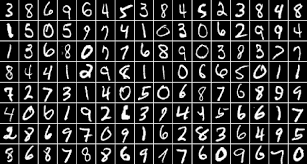

## About Dataset

### Source
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

Dataset link: https://www.kaggle.com/datasets/scolianni/mnistasjpg

### Objective: 
To classify images of handwritten digits (0-9) using a CNN model.
 

### Summary

- Data Preparation: Created TRAIN and TEST directories and its sub-folders (classes). Using shutil, moved files in the ratio 80-20 respectively for each class.
- Model Building: Defined a CNN architecture suitable for digit recognition.
- Model Training: Trained the model using the training data.
- Evaluation: Evaluated the model on the test data and plotted the training history.
- Prediction: Made predictions on new images using the trained model.

> #### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam  # You can try different optimizers



> #### Setting the direcory for train & test image data sets

In [3]:
source= r'E:\DS journey\Deep Learning Datasets\Digit Image Dataset\Main set'
train_dir = r'E:\DS journey\Deep Learning Datasets\Digit Image Dataset\TRAIN'
test_dir = r'E:\DS journey\Deep Learning Datasets\Digit Image Dataset\TEST'

In [4]:
import shutil
import os
from sklearn.model_selection import train_test_split

In [5]:
classes =[i for i in os.listdir(source)]
classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

> #### Creating sub-folders for all classes in TRAIN and TEST

In [6]:
# # creating directories in TRAIN & TEST, based in Main set
# # This code needs to executed only once


# for i in classes:
#     os.mkdir(os.path.join(train_dir,i))
#     os.mkdir(os.path.join(test_dir,i))

> #### Moving files based on 80-20 split

### python code for traversing all classes of Source file

```python

for i in os.listdir(source):
    j= os.path.join(source,i)
    print(j)
```
  
    C:\Users\hp\Python Datasets\Deep Learning\CNN\Digit_Recognizer_CNN\archive (3)\Main set\0
    C:\Users\hp\Python Datasets\Deep Learning\CNN\Digit_Recognizer_CNN\archive (3)\Main set\1
    C:\Users\hp\Python Datasets\Deep Learning\CNN\Digit_Recognizer_CNN\archive (3)\Main set\2
    C:\Users\hp\Python Datasets\Deep Learning\CNN\Digit_Recognizer_CNN\archive (3)\Main set\3
    C:\Users\hp\Python Datasets\Deep Learning\CNN\Digit_Recognizer_CNN\archive (3)\Main set\4
    C:\Users\hp\Python Datasets\Deep Learning\CNN\Digit_Recognizer_CNN\archive (3)\Main set\5
    C:\Users\hp\Python Datasets\Deep Learning\CNN\Digit_Recognizer_CNN\archive (3)\Main set\6
    C:\Users\hp\Python Datasets\Deep Learning\CNN\Digit_Recognizer_CNN\archive (3)\Main set\7
    C:\Users\hp\Python Datasets\Deep Learning\CNN\Digit_Recognizer_CNN\archive (3)\Main set\8
    C:\Users\hp\Python Datasets\Deep Learning\CNN\Digit_Recognizer_CNN\archive (3)\Main set\9

In [7]:
# for i in os.listdir(source):
#     j= os.path.join(source,i)

#     all_images = os.listdir(j)
#     train_images, test_images =train_test_split(all_images, test_size =0.2, random_state =42)

#     for img in train_images:
#         shutil.move(os.path.join(source,i, img), os.path.join(train_dir,i,img))

#     for img in test_images:
#         shutil.move(os.path.join(source,i, img), os.path.join(test_dir,i,img))

> #### Creating ImageDataGenerator objects

In [8]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=40,
                                  width_shift_range =0.2,
                                  height_shift_range =0.2,
                                  shear_range =0.2,
                                  zoom_range =0.2,
                                  horizontal_flip = True,)
test_datagen= ImageDataGenerator(rescale =1/255)

> #### Loading TRAIN & TEST images using ImageDataGenerator objects

In [9]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size= (128,128),
                                                    batch_size =32,
                                                    class_mode ='categorical')
test_generator =test_datagen.flow_from_directory(test_dir, 
                                                 target_size =(128,128), 
                                                 batch_size =32, 
                                                 class_mode ='categorical')

Found 33595 images belonging to 10 classes.
Found 8405 images belonging to 10 classes.


In [10]:
d = {"Classes":[i for i in os.listdir(source)],
    "Train_images":[len(os.listdir(os.path.join(train_dir,i))) for i in os.listdir(train_dir)],
    "Test_images":[len(os.listdir(os.path.join(test_dir,i))) for i in os.listdir(test_dir)]
}

df= pd.DataFrame(d)
df

,Classes,Train_images,Test_images
0,0,3305,827
1,1,3747,937
2,2,3341,836
3,3,3480,871
4,4,3257,815
5,5,3036,759
6,6,3309,828
7,7,3520,881
8,8,3250,813
9,9,3350,838


In [11]:
# Total No. of images
sum(df.Train_images)+sum(df.Test_images)

42000

In [12]:
print("Total Training images: ",sum(df.Train_images),"\nTotal Testing images: ", sum(df.Test_images))

Total Training images:  33595 
Total Testing images:  8405


> #### Creating ImageDataGenerator objects

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')  # Binary classification: cat or dog

Found 33595 images belonging to 10 classes.


In [14]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical')  # Binary classification: cat or dog

Found 8405 images belonging to 10 classes.


In [15]:
num_classes=len(train_generator.class_indices)
train_generator.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

>#### CNN_Model_Architecture

In [16]:
# CNN
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

## ANN
model.add(Dense(100, activation='relu'))

model.add(Dense(50, activation='relu')) # hidden

model.add(Dropout(0.5))  # Regularization to prevent overfitting
model.add(Dense(num_classes, activation='softmax'))  # Output layer (cat or dog)

E:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compiling the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Use categorical_crossentropy for multi-class classification
    metrics=['accuracy']
)

# Printing model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     2,508,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,607,708 (9.95 MB)

 Trainable params: 2,607,708 (9.95 MB)

 Non-trainable params: 0 (0.00 B)

>#### Using ModelCheckpoint Callback

In [18]:
# Define ModelCheckpoint callback to save the best weights
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(r'best_model.keras', 
                             monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[checkpoint],
    shuffle = False
)



Epoch 1/10


E:\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 695ms/step - accuracy: 0.3104 - loss: 1.8700
Epoch 1: val_accuracy improved from -inf to 0.80690, saving model to best_model.keras
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 813s 772ms/step - accuracy: 0.3106 - loss: 1.8697 - val_accuracy: 0.8069 - val_loss: 0.5895
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.6693 - loss: 0.9725
Epoch 2: val_accuracy improved from 0.80690 to 0.84735, saving model to best_model.keras
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 584s 556ms/step - accuracy: 0.6694 - loss: 0.9724 - val_accuracy: 0.8474 - val_loss: 0.3735
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 618ms/step - accuracy: 0.7658 - loss: 0.7009
Epoch 3: val_accuracy improved from 0.84735 to 0.89149, saving model to best_model.keras
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 676s 644ms/step - accuracy: 0.7658 - loss: 0.7009 - val_accuracy: 0.8915 - val_loss: 0.3288
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.7883 - loss: 0.6280
Epoch 4: val_accur

> #### Model-evaluation

In [19]:
# Load the best weights
model.load_weights('best_model.keras')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')

# Evaluate the model
train_loss, train_accuracy = model.evaluate(train_generator)
print(f'Train accuracy: {train_accuracy:.4f}')
print(f'Train loss: {train_loss:.4f}')

263/263 ━━━━━━━━━━━━━━━━━━━━ 28s 106ms/step - accuracy: 0.9516 - loss: 0.1566
Test accuracy: 0.9524
Test loss: 0.1627
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 261s 249ms/step - accuracy: 0.9062 - loss: 0.2954
Train accuracy: 0.9058
Train loss: 0.2925


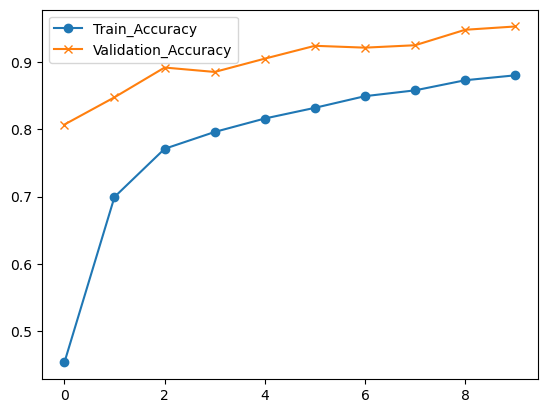

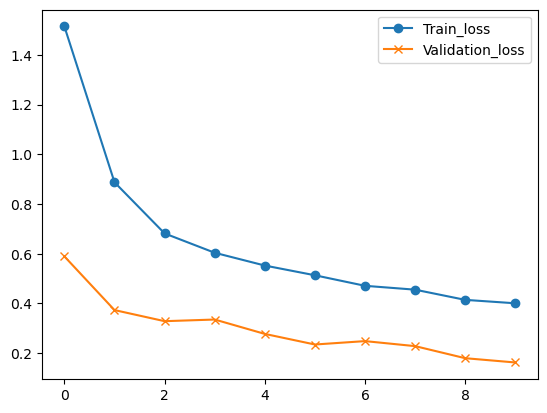

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], marker ='o' ,label ='Train_Accuracy')
plt.plot(history.history['val_accuracy'], marker ='x',label ='Validation_Accuracy')
plt.legend()
plt.show()

# Similar plot for loss
plt.plot(history.history['loss'], marker ='o',label ='Train_loss')
plt.plot(history.history['val_loss'],marker ='x',label ='Validation_loss')
plt.legend()
plt.show()

>#### Make Predictions

In [21]:
import os
# Load and preprocess a single image
img_paths= [os.path.join(r'E:\DS journey\Deep Learning Datasets\Digit Image Dataset\testSet\testSet', i) for i in \
                        os.listdir(r'E:\DS journey\Deep Learning Datasets\Digit Image Dataset\testSet\testSet')]
            
len(img_paths)

28000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


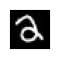

value of the above image is: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


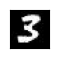

value of the above image is: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


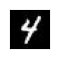

value of the above image is: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


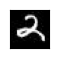

value of the above image is: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


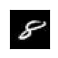

value of the above image is: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


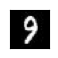

value of the above image is: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


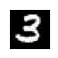

value of the above image is: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


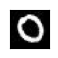

value of the above image is: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


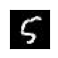

value of the above image is: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


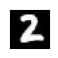

value of the above image is: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


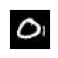

value of the above image is: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


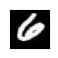

value of the above image is: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


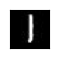

value of the above image is: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


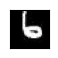

value of the above image is: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


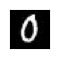

value of the above image is: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


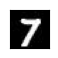

value of the above image is: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


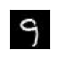

value of the above image is: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


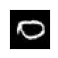

value of the above image is: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


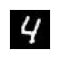

value of the above image is: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


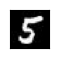

value of the above image is: 5


In [22]:
img_path_=img_paths[27010:27030]  # enter indices here

for img_path in img_path_:
    
    # Load and preprocess a single image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    # Predict
    prediction = model.predict(img_array)
    predicted_labels = int(np.argmax(prediction, axis=1).reshape(1,1))
    # image plot part
    plt.figure(figsize =(0.5,0.5))
    plt.tick_params(left = False, right = False , labelleft = False , 
                    labelbottom = False, bottom = False)

    plt.imshow(img_array.reshape(128,128,3))
    plt.show()
    print("value of the above image is:",predicted_labels)
    

## Observations
- The Digit Dataset has 10 classes from 0,1,2...9.
- Firstly created the TRAIN & TEST folders and sub-folders based on classes.
- Using the shutil library copied images from source to respective directories maintaining a 80-20 split.
- Loaded the image data using ImageDataGenrator class object and methods.
- CNN model was created and Results after 10 epochs with 3 Conv layers, 3 max pooling and 3 Dense layers is as follows:
    - Train accuracy: 0.9058- loss: 0.2925
    - Test accuracy: 0.9524- loss: 0.1627
    